# Investigation into the magnitude of DCR effects

## Setup

Import libraries

In [1]:
%matplotlib inline
import calcRefractiveIndex
from calcRefractiveIndex import refraction as refraction
from calcRefractiveIndex import diff_refraction as diff
from matplotlib import pyplot as plt
import numpy as np

import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab

Define a few helpful functions

In [43]:
def arcsec(var):
    return var * 3600.
def minmax(var):
    return [np.min(var),np.max(var)]

Test the calculation of refraction, and verify the correct spectral index is being used.
Should give:

n_delta = 27978.69

refraction = 20.990

In [44]:
print("n_delta = ",calcRefractiveIndex.n_delta(354., 1., 0.02, 20.) )
print("refraction = ",arcsec(refraction(20.,wavelength=354., atmospheric_pressure = 1., water_vapor_pressure = 0.02,
                        temperature = 20. , latitude = -30.244639, altitude = 2663.)))
#print(arcsec(diff(20.,wavelength=354.,bandwidth=66., atmospheric_pressure = 1., 
#                  water_vapor_pressure = 0.02, temperature = 20. , latitude = -30.244639, altitude = 2663.)))

('n_delta = ', 27978.690890728787)
('refraction = ', 20.990408937334969)


Define the temperature, pressure, and zenith angle ranges to use

In [45]:
base_temp = 10.
temps=np.array(range(100))/3.
temps = base_temp + temps - np.mean(temps)

base_pressure = 586.7 # mm Hg
base_pressure_atm=base_pressure / 760.

pressure_delta = 0.001
pressure_range = 0.1
pressures = ((np.array(range(1+int(2*pressure_range/pressure_delta)))* pressure_delta - pressure_range /2.) 
            * base_pressure_atm + base_pressure_atm)

angle_delta = 0.5
angle_max = 75.
zenith_angles = np.array(range(1+int(angle_max/angle_delta))) * angle_delta 

# u band

## 1D plots

Plot the magnitude of DCR as a function of zenith angle, temperature, pressure individually

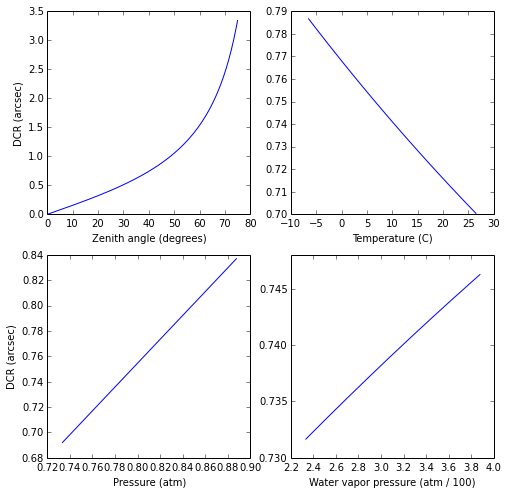

In [88]:
wavelength = 354.
bandwidth = 66.

dcr_za = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, temperature = base_temp, 
            atmospheric_pressure = base_pressure_atm)

dcr_temperature = diff(40., wavelength=wavelength, bandwidth = bandwidth, temperature = temps, 
            atmospheric_pressure = base_pressure_atm)

dcr_pressure= diff(40., wavelength=wavelength, bandwidth = bandwidth, temperature = 15., 
            atmospheric_pressure = pressures)

dcr_water= diff(40., wavelength=wavelength, bandwidth = bandwidth, temperature = 15., 
            atmospheric_pressure = base_pressure_atm + pressures / 10. - 0.07, 
            water_vapor_pressure = pressures / 10. - 0.05)

fig=plt.figure(figsize=(8,8))
plot_1 = fig.add_subplot(2,2,1)
plot_2 = fig.add_subplot(2,2,2)
plot_3 = fig.add_subplot(2,2,3)
plot_4 = fig.add_subplot(2,2,4)
za_plot=plot_1.plot(zenith_angles,arcsec(dcr_za))
lx = plot_1.set_xlabel('Zenith angle (degrees)')
ly = plot_1.set_ylabel('DCR (arcsec)')

temperature_plot = plot_2.plot(temps,arcsec(dcr_temperature))
lx = plot_2.set_xlabel('Temperature (C)')
#ly = plot_2.set_ylabel('DCR (arcsec)')

temperature_plot = plot_3.plot(pressures,arcsec(dcr_pressure))
lx = plot_3.set_xlabel('Pressure (atm)')
ly=plot_3.set_ylabel('DCR (arcsec)')

water_plot = plot_4.plot((pressures / 10. - 0.05)*100,arcsec(dcr_water))
lx = plot_4.set_xlabel('Water vapor pressure (atm / 100)')
#ly = plot_4.set_ylabel('DCR (arcsec)')

## 2D plots

Now create a 3D array of differential refraction amplitudes as a function of zenith angle, temperature, and pressure

In [71]:
wavelength = 354.
bandwidth = 66.
diff_refract_arr = np.zeros([temps.size, zenith_angles.size, pressures.size])
for p_i in range(pressures.size):
    diff_refract_arr[:, :, p_i] = diff(zenith_angles, wavelength=wavelength, bandwidth = bandwidth, 
            temperature = temps, atmospheric_pressure = pressures[p_i])

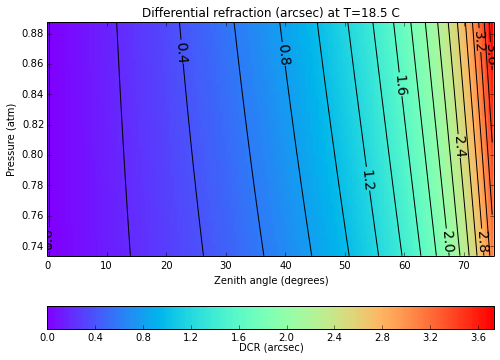

In [89]:
Y = pressures
X = zenith_angles
z_slice = 75
Z = arcsec(diff_refract_arr[z_slice, :, :]).T

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith angle (degrees)')
ax.set_ylabel('Pressure (atm)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at T=' + str(round(temps[z_slice]*100)/100) + ' C')


cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_ZA-Pressure.png')

plt.show()


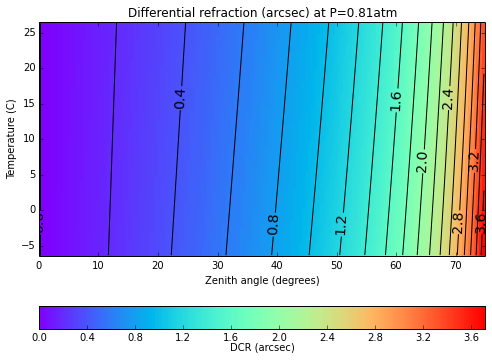

In [90]:
Y = temps
X = zenith_angles
z_slice=100
Z = arcsec(diff_refract_arr[:, :, z_slice])

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.2)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Zenith angle (degrees)')
ax.set_ylabel('Temperature (C)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at P=' + str(round(pressures[z_slice]*100)/100) + 'atm')

cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_ZA-Temperature.png')
plt.show()

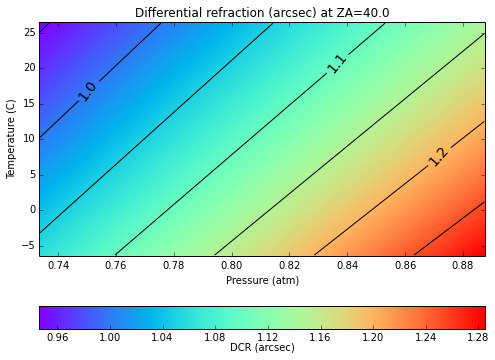

In [91]:
X = pressures
Y = temps
Z = arcsec(diff_refract_arr[:, z_slice, :])
z_slice=80

x_min, x_max = minmax(X)
y_min, y_max = minmax(Y)
X, Y = np.meshgrid(X, Y)

fig = plt.figure(figsize=(8,6))
extent = [x_min, x_max, y_min, y_max]
fig_show = plt.imshow(Z, interpolation='none', origin='lower', cmap=cm.rainbow, extent=extent)
levels = np.arange(0, 4, 0.05)
CS = plt.contour( Z, levels=levels, origin='lower', linewidths=1, colors='k', extent=extent)

ax = fig.add_subplot(1,1,1)
ax.set_aspect('auto')
ax.set_xlabel('Pressure (atm)')
ax.set_ylabel('Temperature (C)')
plt.clabel(CS, levels[0::2], inline=1, fmt='%1.1f', fontsize=14, colors='k')

ptitle=plt.title('Differential refraction (arcsec) at ZA=' + str(zenith_angles[z_slice]))

cbar=plt.colorbar(fig_show, orientation='horizontal', shrink=1)
cbar.set_label('DCR (arcsec)', labelpad=0, rotation=0)
plt.savefig('DCR_Pressure-Temperature.png')
plt.show()